### 强大的Series
* Series和DataFrame可以统一来看待
* Series可以看做只有一个Column的DF；DF可以看做是一组具有统一索引的Series
* Series可以看做是带有index的list， enumerate(list)
* Series可以看做是是dict， index相当于key

In [1]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts


pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

CPU times: user 9 µs, sys: 9 µs, total: 18 µs
Wall time: 48.9 µs


In [4]:
pro = ts.pro_api('5fd1639100f8a22b7f86e882e03192009faa72bae1ae93803e1172d5')
df = pro.daily(ts_code='600000.SH', start_date='20190401', end_date='20190430')

In [5]:
df.columns

Index(['ts_code', 'trade_date', 'open', 'high', 'low', 'close', 'pre_close',
       'change', 'pct_chg', 'vol', 'amount'],
      dtype='object')

In [6]:
df.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,2.100000e+01
mean,11.630476,11.777619,11.524286,11.637143,11.604286,0.032857,0.296252,5.734931e+05,6.704836e+05
std,0.215348,0.228930,0.184840,0.207512,0.206799,0.193213,1.671099,2.333355e+05,2.792896e+05
min,11.350000,11.520000,11.280000,11.320000,11.280000,-0.300000,-2.497900,2.627369e+05,3.017520e+05
25%,11.470000,11.560000,11.410000,11.480000,11.470000,-0.060000,-0.519900,4.102754e+05,4.739735e+05
50%,11.560000,11.750000,11.480000,11.540000,11.540000,0.000000,0.000000,5.027103e+05,5.757994e+05
75%,11.760000,11.990000,11.650000,11.720000,11.710000,0.100000,0.839600,7.050917e+05,8.161270e+05
max,12.020000,12.200000,11.880000,12.010000,12.010000,0.490000,4.268300,1.234747e+06,1.466715e+06


### 直方图

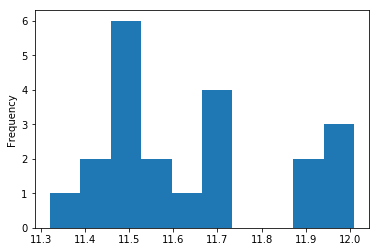

In [7]:
df['close'].plot(kind='hist', rot=0)

### 箱型图

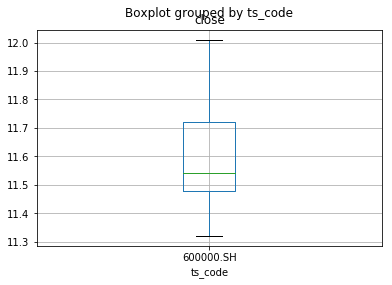

In [8]:
df.boxplot(column='close', by='ts_code', rot=0)

### 散点图

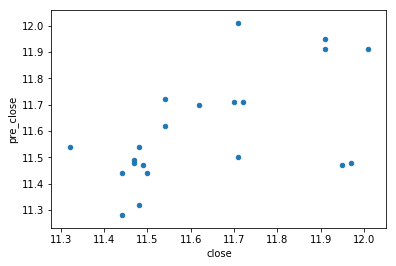

In [9]:
df.plot(kind='scatter', x='close', y='pre_close', rot=0)

## 去除不需要的行、列

【header】默认header=0，即将文件中的0行作为列名和数据的开头，但有时候0行的数据是无关的，我们想跳过0行，让1行作为数据的开头，可以通过将header设置为1来实现。

【usecols】根据列的位置或名字，如[0,1,2]或[‘a’, ‘b’, ‘c’]，选出特定的列。

【nrows】要导入的数据行数，在数据量很大、但只想导入其中一部分时使用。